In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# loaddataset 
dataset = pd.read_csv('diabetes.csv') 

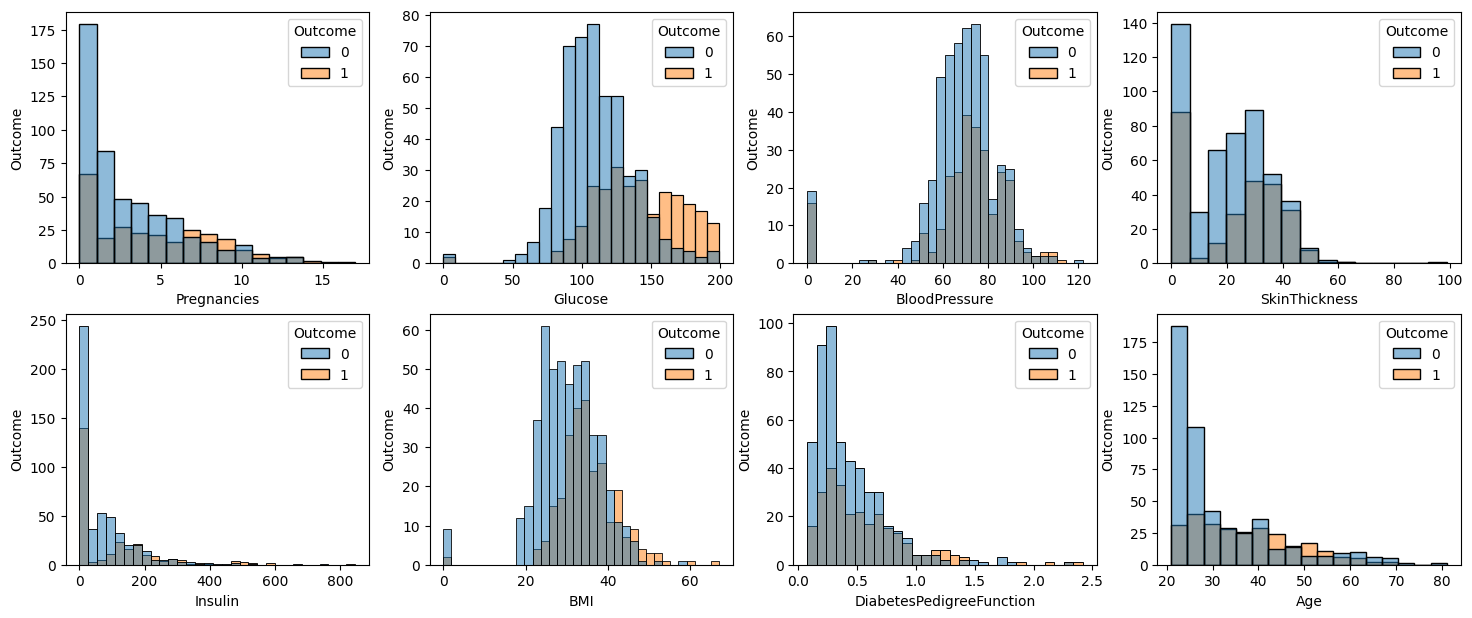

In [3]:
plotnumber=1
featureList=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
numFeatures = len(featureList)
plt.figure(figsize=(18,15),facecolor='white')
for i in featureList:
    if(plotnumber<=numFeatures):
        plt.subplot(4,4,plotnumber)
        sns.histplot(x=i,data=dataset,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

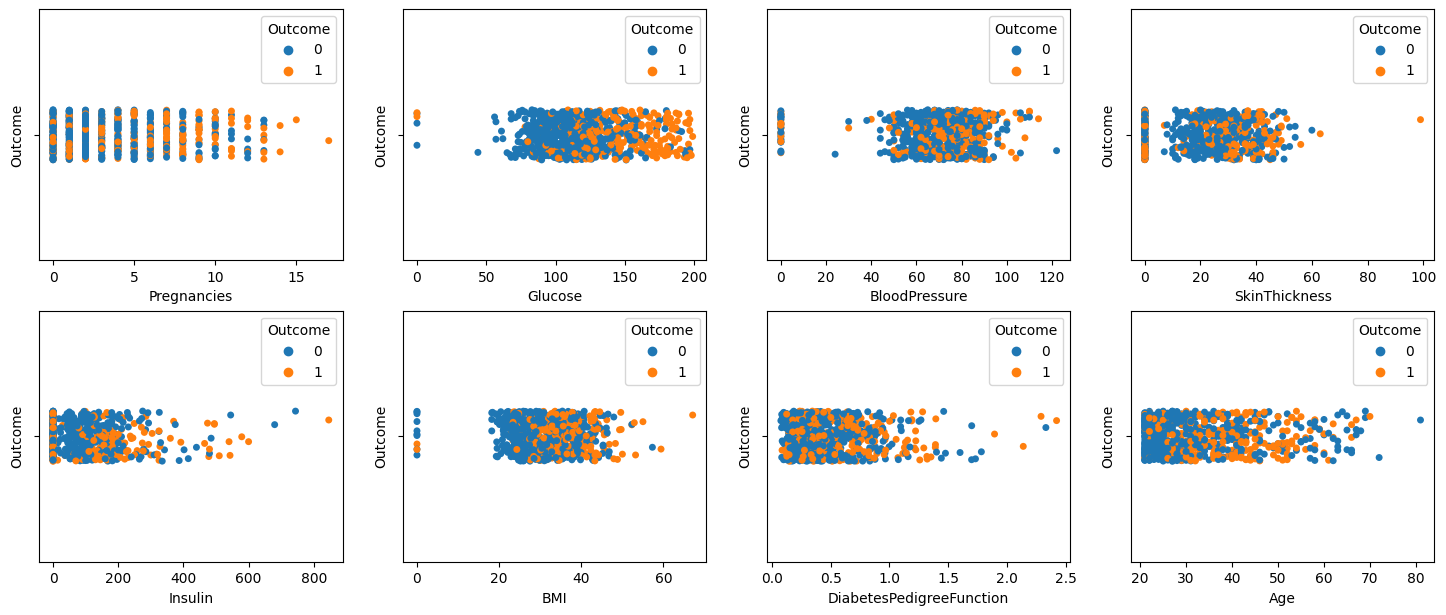

In [4]:
plotnumber=1
plt.figure(figsize=(18,15),facecolor='white')
for i in featureList:
    if(plotnumber<=numFeatures):
        plt.subplot(4,4,plotnumber)
        sns.stripplot(x=i,data=dataset,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

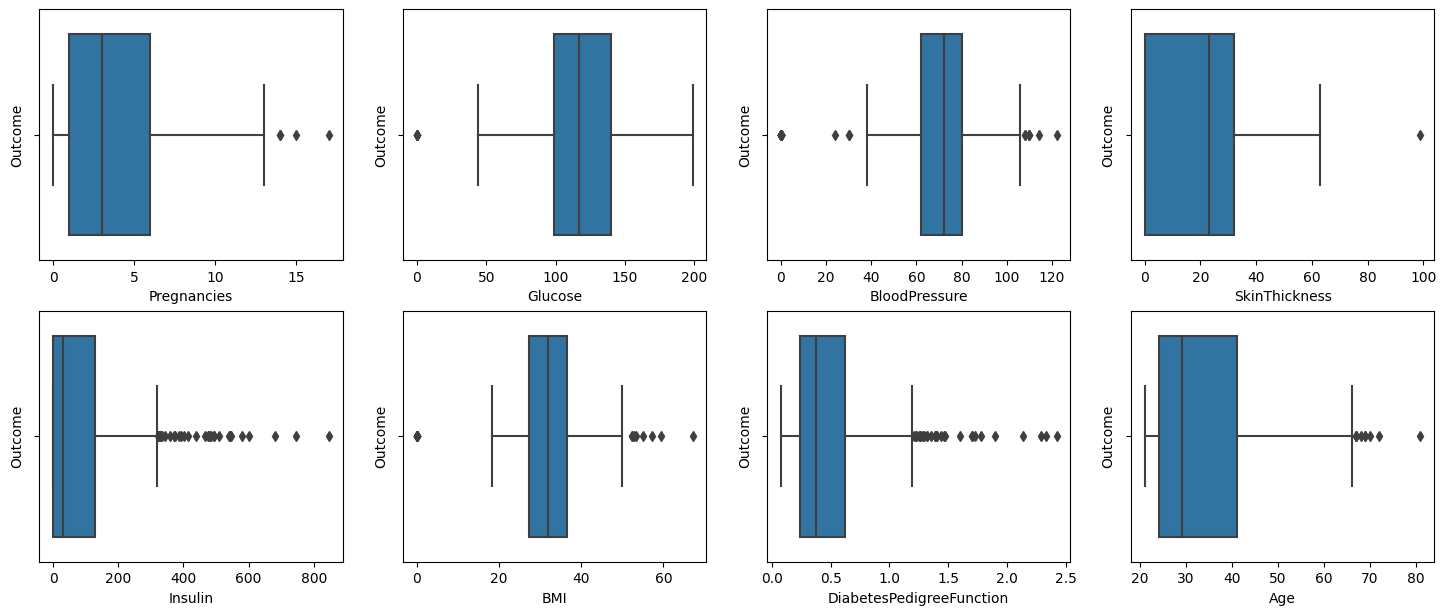

In [5]:
plotnumber=1
plt.figure(figsize=(18,15),facecolor='white')
for i in featureList:
    if(plotnumber<=numFeatures):
        plt.subplot(4,4,plotnumber)
        sns.boxplot(x=i,data=dataset,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

In [6]:
# fill the dataset with the median in places where the value is zero: 
dataset.loc[dataset['Glucose']==0,'Glucose']=np.median(dataset.Glucose)
dataset.loc[dataset['BloodPressure']==0,'BloodPressure']=np.median(dataset.BloodPressure)
dataset.loc[dataset['DiabetesPedigreeFunction']==0,'DiabetesPedigreeFunction']=np.median(dataset.DiabetesPedigreeFunction)
dataset.loc[dataset['BMI']==0,'BMI']=np.median(dataset.BMI)
dataset.loc[dataset['Insulin']==0,'Insulin']=np.median(dataset.Insulin)
dataset.loc[dataset['SkinThickness']==0,'SkinThickness']=np.median(dataset.SkinThickness)

In [7]:
# Lets go into the preprocessing phase 
from sklearn.preprocessing import MinMaxScaler
temp1=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
scaling=MinMaxScaler()
# replace the columns of the dataset with its transformed version 
dataset.loc[:,temp1]=scaling.fit_transform(dataset.loc[:,temp1])

<Axes: >

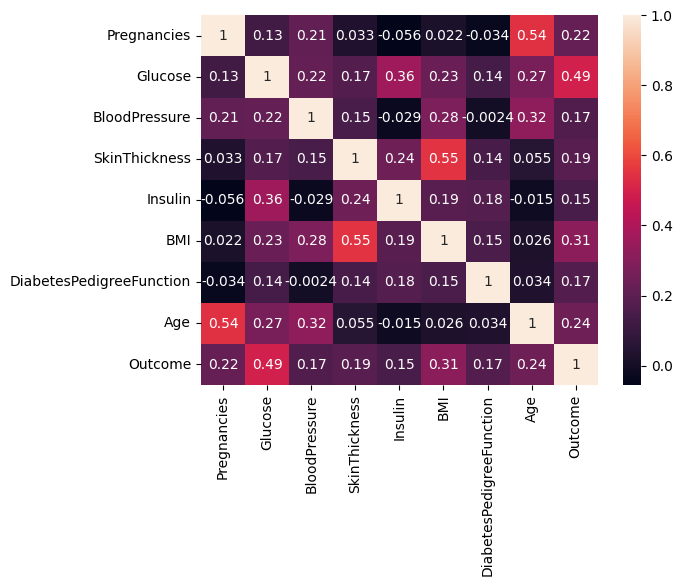

In [8]:
# check the correlations with each other 
heat = dataset.corr() 
sns.heatmap(heat, annot=True)

In [9]:
x=dataset.iloc[:,:-1]
y=dataset.Outcome
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define logistic regression model
logistic_model = LogisticRegression()

# Define hyperparameters to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
              'penalty': ['l1', 'l2'],                 # Penalty norm
              'solver': ['liblinear']}                 # Solver for optimization problem


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

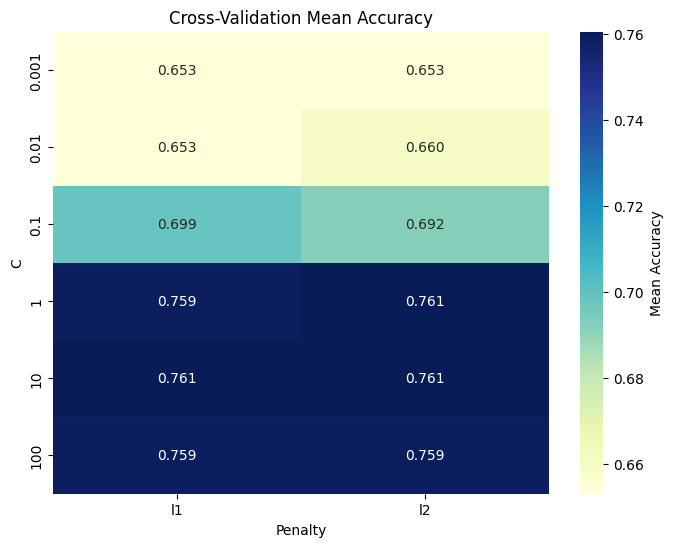

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract CV results
cv_results = grid_search.cv_results_
scores_mean = np.array(cv_results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['penalty']))

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(scores_mean, annot=True, fmt=".3f", xticklabels=param_grid['penalty'], yticklabels=param_grid['C'], cmap="YlGnBu")
plt.xlabel('Penalty')
plt.ylabel('C')
plt.title('Cross-Validation Mean Accuracy')

# Labeling color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Accuracy')

plt.show()


In [12]:
# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
logistic_y_predict = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, logistic_y_predict)
print("Logistic Regression ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, logistic_y_predict))

Logistic Regression ----->
Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score:  0.7987012987012987
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        99
           1       0.82      0.56      0.67        55

    accuracy                           0.80       154
   macro avg       0.80      0.75      0.76       154
weighted avg       0.80      0.80      0.79       154



In [13]:
from sklearn.svm import SVC
# Define SVM model
svc_model = SVC()

# Define hyperparameters to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  # Kernel type

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

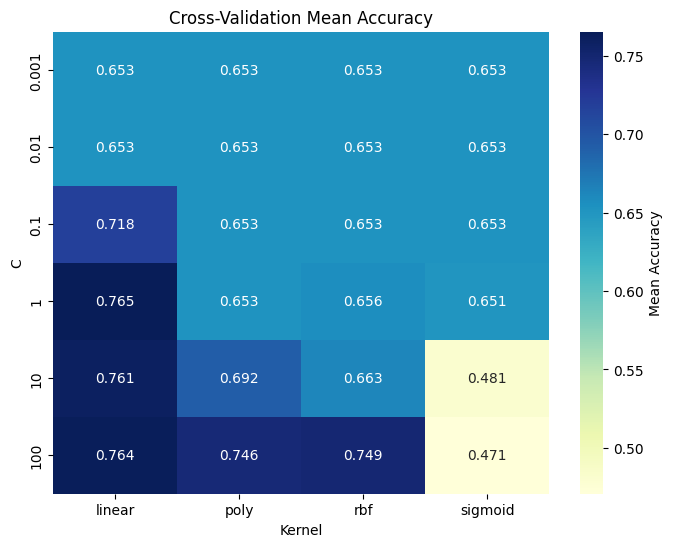

In [14]:
# Extract CV results
cv_results = grid_search.cv_results_
scores_mean = np.array(cv_results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['kernel']))

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(scores_mean, annot=True, fmt=".3f", xticklabels=param_grid['kernel'], yticklabels=param_grid['C'], cmap="YlGnBu")
plt.xlabel('Kernel')
plt.ylabel('C')
plt.title('Cross-Validation Mean Accuracy')

# Labeling color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Accuracy')

plt.show()

In [15]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
svc_predict = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svc_predict)
print("SVM ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, svc_predict))

SVM ----->
Best Parameters:  {'C': 1, 'kernel': 'linear'}
Accuracy Score:  0.7987012987012987
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.79      0.60      0.68        55

    accuracy                           0.80       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.80      0.80      0.79       154



In [16]:
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree model
dt_model = DecisionTreeClassifier()

# Define hyperparameters to search
param_grid = {'criterion': ['gini', 'entropy'],  # Split criterion
              'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
              'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
              'min_samples_leaf': [1, 2, 4]}  # Minimum number of samples required to be at a leaf node


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

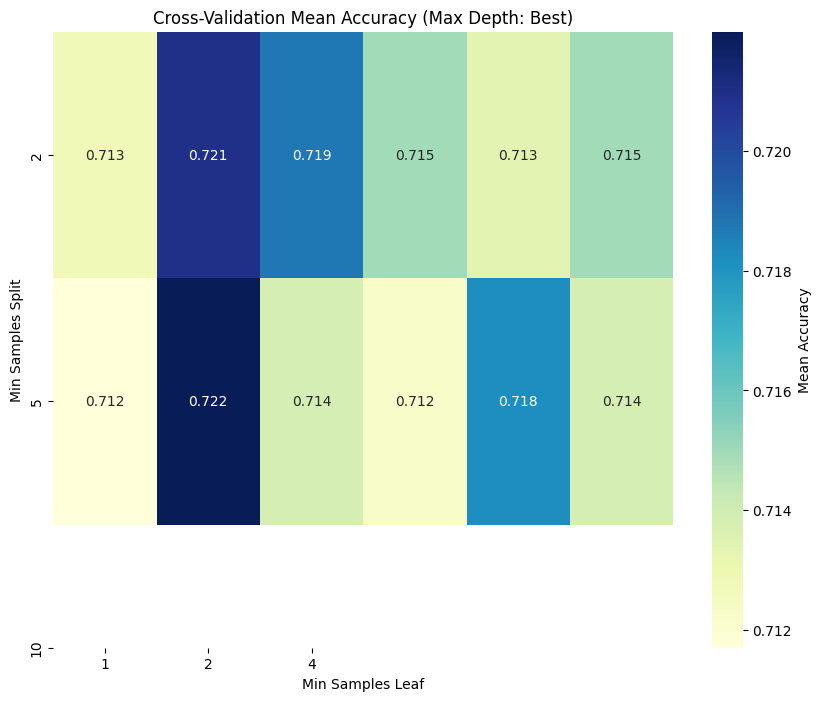

In [17]:
# Extract CV results
cv_results = grid_search.cv_results_
scores_mean = np.array(cv_results['mean_test_score']).reshape(len(param_grid['criterion']), 
                                                              len(param_grid['max_depth']), 
                                                              len(param_grid['min_samples_split']),
                                                              len(param_grid['min_samples_leaf']))

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(scores_mean.mean(axis=2).max(axis=2), annot=True, fmt=".3f", 
                      xticklabels=param_grid['min_samples_leaf'], 
                      yticklabels=param_grid['min_samples_split'], cmap="YlGnBu")
plt.xlabel('Min Samples Leaf')
plt.ylabel('Min Samples Split')
plt.title('Cross-Validation Mean Accuracy (Max Depth: Best)')

# Labeling color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Accuracy')

plt.show()

In [18]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
dt_predict = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_predict)
print("Decision Tree ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, dt_predict))


Decision Tree ----->
Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy Score:  0.7792207792207793
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [19]:
from sklearn.ensemble import RandomForestClassifier
# Define Random Forest model
rf_model = RandomForestClassifier()


# Define hyperparameters to search
param_grid = {'n_estimators': [50, 100, 200],  # Number of trees in the forest
              'criterion': ['gini', 'entropy'],  # Split criterion
              'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
              'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
              'min_samples_leaf': [1, 2, 4]}  # Minimum number of samples required to be at a leaf node


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

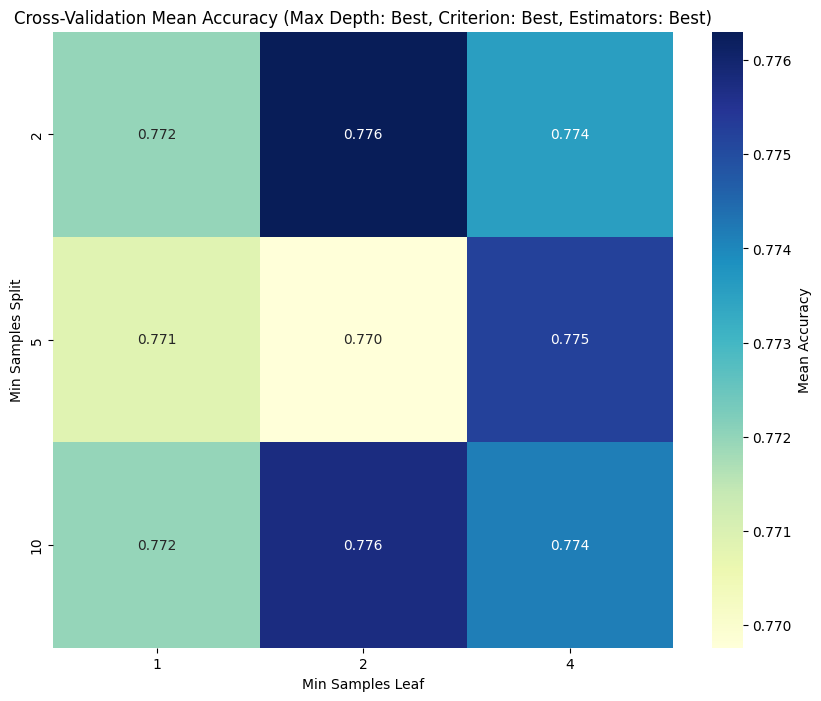

In [20]:
# Extract CV results
cv_results = grid_search.cv_results_
scores_mean = np.array(cv_results['mean_test_score']).reshape(len(param_grid['n_estimators']),
                                                              len(param_grid['criterion']),
                                                              len(param_grid['max_depth']),
                                                              len(param_grid['min_samples_split']),
                                                              len(param_grid['min_samples_leaf']))

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(scores_mean.mean(axis=0).max(axis=0).max(axis=0), annot=True, fmt=".3f",
                      xticklabels=param_grid['min_samples_leaf'],
                      yticklabels=param_grid['min_samples_split'], cmap="YlGnBu")
plt.xlabel('Min Samples Leaf')
plt.ylabel('Min Samples Split')
plt.title('Cross-Validation Mean Accuracy (Max Depth: Best, Criterion: Best, Estimators: Best)')

# Labeling color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Accuracy')

plt.show()

In [21]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
rf_predict = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_predict)
print("Random Forest ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, rf_predict))

Random Forest ----->
Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score:  0.8116883116883117
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        99
           1       0.80      0.64      0.71        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [22]:
from sklearn.neighbors import KNeighborsClassifier
# Define KNN model
knn_model = KNeighborsClassifier()

# Define hyperparameters to search
param_grid = {'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
              'weights': ['uniform', 'distance'],  # Weight function used in prediction
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}  # Algorithm used to compute the nearest neighbors


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [23]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
knn_predict = best_model.predict(x_test)
accuracy = accuracy_score(y_test, knn_predict)
# Evaluate the model
print("K-Nearest Neighbors ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, knn_predict))

K-Nearest Neighbors ----->
Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy Score:  0.6883116883116883
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        99
           1       0.61      0.35      0.44        55

    accuracy                           0.69       154
   macro avg       0.66      0.61      0.61       154
weighted avg       0.67      0.69      0.66       154



In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Define hyperparameters to search
param_grid = {'n_estimators': [50, 100, 200],  # Number of boosting stages
              'learning_rate': [0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
              'max_depth': [3, 4, 5]}  # Maximum depth of the individual regression estimators

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [25]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
gb_predict = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, gb_predict)
# Evaluate the model
accuracy = accuracy_score(y_test, gb_predict)
print("Gradient Boosting Machine ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, gb_predict))


Gradient Boosting Machine ----->
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy Score:  0.7662337662337663
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



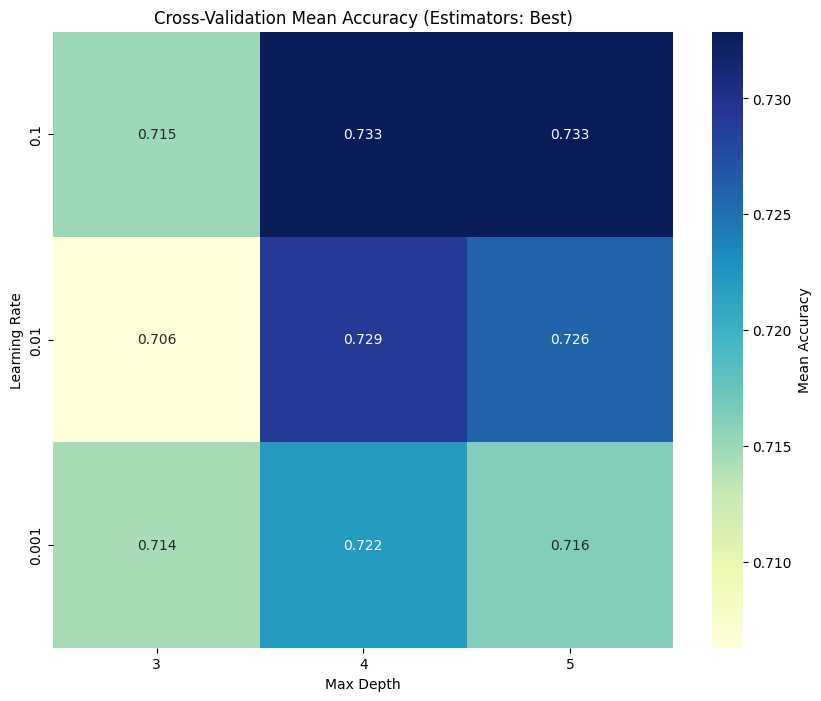

In [26]:
# Extract CV results
cv_results = grid_search.cv_results_
scores_mean = np.array(cv_results['mean_test_score']).reshape(len(param_grid['n_estimators']),
                                                              len(param_grid['learning_rate']),
                                                              len(param_grid['max_depth']))

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(scores_mean.mean(axis=0), annot=True, fmt=".3f",
                      xticklabels=param_grid['max_depth'],
                      yticklabels=param_grid['learning_rate'], cmap="YlGnBu")
plt.xlabel('Max Depth')
plt.ylabel('Learning Rate')
plt.title('Cross-Validation Mean Accuracy (Estimators: Best)')

# Labeling color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Accuracy')

plt.show()

AdaBoost ----->
Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy Score:  0.8116883116883117
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        99
           1       0.75      0.71      0.73        55

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



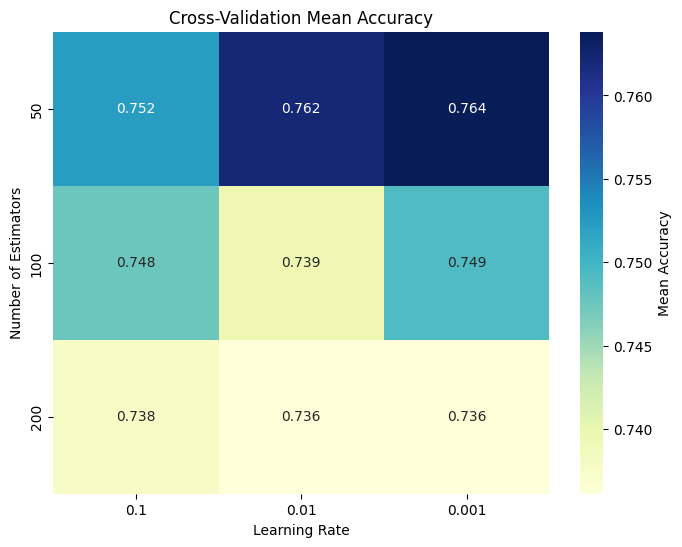

In [27]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()


# Define hyperparameters to search
param_grid = {'n_estimators': [50, 100, 200],  # Number of weak learners
              'learning_rate': [0.1, 0.01, 0.001]}  # Weight applied to each weak learner

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
adaboost_predict = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, adaboost_predict)
print("AdaBoost ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, adaboost_predict))


# Extract CV results
cv_results = grid_search.cv_results_
scores_mean = np.array(cv_results['mean_test_score']).reshape(len(param_grid['n_estimators']),
                                                              len(param_grid['learning_rate']))

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(scores_mean, annot=True, fmt=".3f",
                      xticklabels=param_grid['learning_rate'],
                      yticklabels=param_grid['n_estimators'], cmap="YlGnBu")
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.title('Cross-Validation Mean Accuracy')

# Labeling color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Accuracy')

plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB
# Define Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(x_train, y_train)

# Make predictions
nb_predict = nb_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, nb_predict)
print("Naive Bayes ----->")
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, nb_predict))

Naive Bayes ----->
Accuracy Score:  0.7597402597402597
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



In [29]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Define Gaussian Process kernel (RBF kernel is commonly used)
kernel = 1.0 * RBF(length_scale=1.0)

# Define Gaussian Process classifier
gp_model = GaussianProcessClassifier(kernel=kernel)

# Train the model
gp_model.fit(x_train, y_train)

# Make predictions
gp_predict = gp_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, gp_predict)
print("Gaussian Process Classifier ----->")
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, gp_predict))

Gaussian Process Classifier ----->
Accuracy Score:  0.8181818181818182
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        99
           1       0.83      0.62      0.71        55

    accuracy                           0.82       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.82      0.82      0.81       154

